In [ ]:
# ==============================================================================
# PROYECTO: CRSN Slides (3J)
# BLOQUE: 0 - Inicialización, Rutas y Módulo Core
# FECHA: 2026-01-26 [lun] 14:30
# ROL: Lead Data Scientist - Pedro J. Lancheros
# ==============================================================================

import os
import sys
import pandas as pd
import re
from google.colab import drive

# 1. MONTAJE DE DRIVE
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

# 2. DEFINICIÓN DE NOMENCLATURA Y RUTAS (PJLA v2.1)
PROYECTO_VERSION = "v1.0"
BASE_PATH = "/content/drive/MyDrive/01_projects/crsn-slides-actividades-2025"
ROOT_DIR = os.path.join(BASE_PATH, f"CRSN_Slides_2015_2025_{PROYECTO_VERSION}")

sub_folders = [
    "00_template",
    "10_diezmos",
    "20_ministerios",
    "99_outputs_final",
    f"logs_{PROYECTO_VERSION}"
]

print(f"🚀 Iniciando construcción de infraestructura en: {ROOT_DIR}")

# 3. CREACIÓN DE CARPETAS FÍSICAS
for folder in sub_folders:
    path = os.path.join(ROOT_DIR, folder)
    os.makedirs(path, exist_ok=True)
    print(f"✅ Carpeta garantizada: {folder}")

# 4. CREACIÓN DEL MÓDULO CORE 'utils_crsn.py' (Reconstrucción Total)
# Este archivo es el "Single Source of Truth" para funciones de limpieza y cálculo
core_content = """
import pandas as pd
import numpy as np
import re

def clean_val(v):
    \"\"\"Limpieza defensiva PJLA: elimina $, comas y espacios, retorna float.\"\"\"
    if pd.isna(v): return 0.0
    s = re.sub(r'[^\\d.]', '', str(v).replace(',', ''))
    try: return float(s) if s else 0.0
    except: return 0.0

def index_base_100(series):
    \"\"\"Calcula Índice (2015 = 100).\"\"\"
    valid = series[series > 0]
    if valid.empty: return series * 0
    base = valid.iloc[0]
    return (series / base * 100).round(0).astype(int)

def calc_yoy(series):
    \"\"\"Calcula Variación Porcentual YoY sin decimales para slides.\"\"\"
    return (series.pct_change().fillna(0) * 100).round(0).astype(int)
"""

utils_path = os.path.join(ROOT_DIR, "00_template", "utils_crsn.py")
with open(utils_path, "w") as f:
    f.write(core_content.strip())

# 5. REGISTRO EN EL SYSTEM PATH PARA IMPORTACIÓN
if os.path.join(ROOT_DIR, "00_template") not in sys.path:
    sys.path.append(os.path.join(ROOT_DIR, "00_template"))

print(f"✅ Módulo CORE inyectado en: {utils_path}")
print(f"✅ Proceso finalizado correctamente.")
print(f"📊 Notebook ejecutado al 100%.")
print(f"📁 Archivos generados en: {ROOT_DIR}")

🚀 Iniciando construcción de infraestructura en: /content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/CRSN_Slides_2015_2025_v1.0
✅ Carpeta garantizada: 00_template
✅ Carpeta garantizada: 10_diezmos
✅ Carpeta garantizada: 20_ministerios
✅ Carpeta garantizada: 99_outputs_final
✅ Carpeta garantizada: logs_v1.0
✅ Módulo CORE inyectado en: /content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/CRSN_Slides_2015_2025_v1.0/00_template/utils_crsn.py
✅ Proceso finalizado correctamente.
📊 Notebook ejecutado al 100%.
📁 Archivos generados en: /content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/CRSN_Slides_2015_2025_v1.0


🚀 Procesando Diezmos desde: /content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/crsn-2015-2025.xlsx


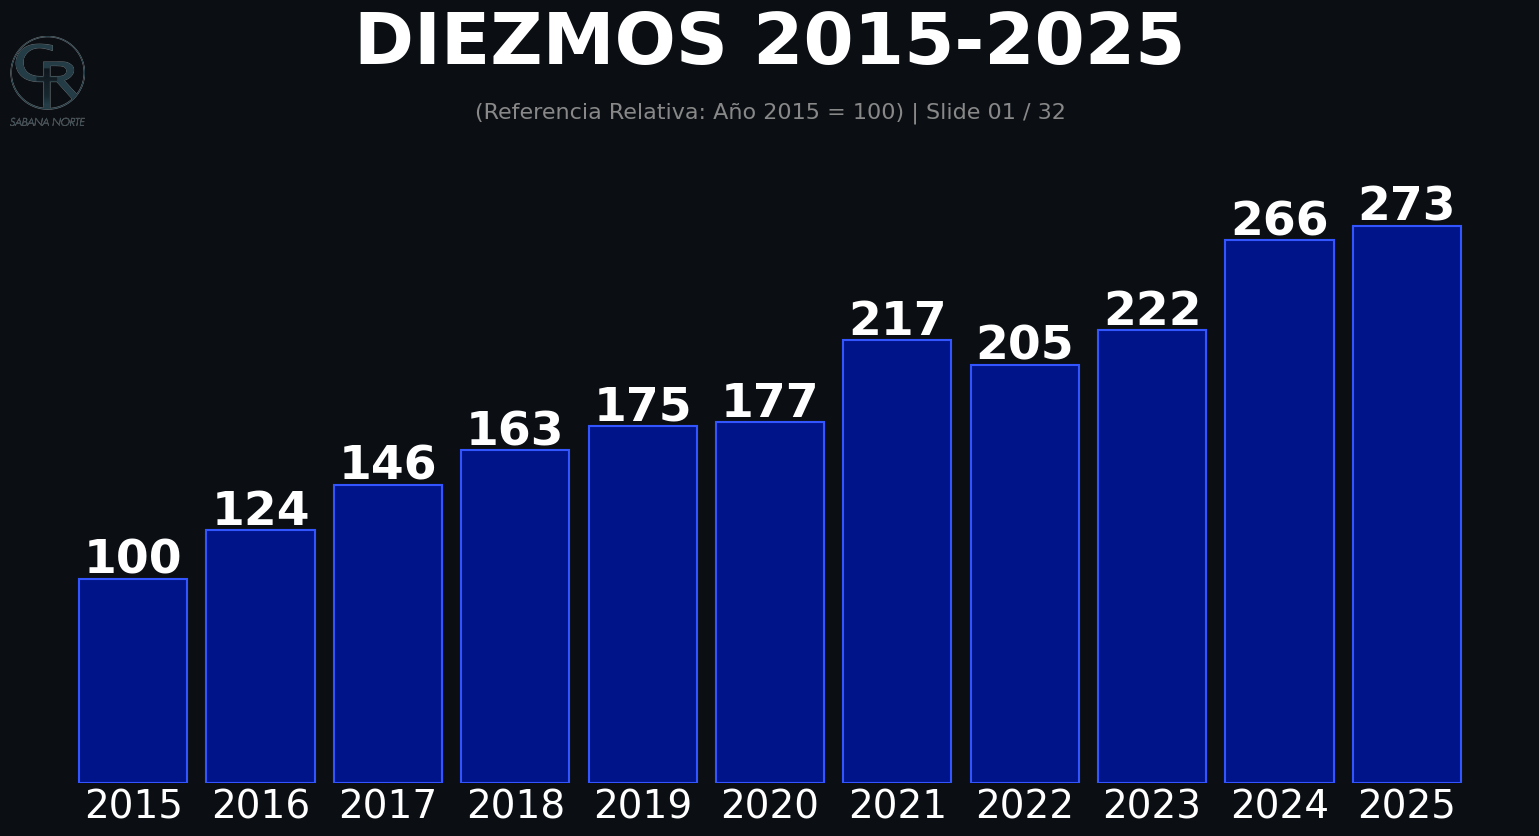

✅ Bloque 1 finalizado: Slide 01 producida.
📁 Archivo generado en: /content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/CRSN_Slides_2015_2025_v1.0/10_diezmos/slide_01_diezmos_v1.0.png


In [21]:
# ==============================================================================
# PROYECTO: CRSN Slides (3J)
# BLOQUE: 1 - Producción Directa de Diezmos (v4.0)
# FECHA: 2026-01-26 [lun] 14:40
# ROL: Lead Data Scientist - Pedro J. Lancheros
# ==============================================================================

import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re

# 1. CONFIGURACIÓN DE RUTAS DIRECTAS (Confirmadas por el usuario)
EXCEL_PATH = "/content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/crsn-2015-2025.xlsx"
LOGO_PATH = "/content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/crsn-logo-circulo.png"
OUTPUT_DIR = "/content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/CRSN_Slides_2015_2025_v1.0/10_diezmos"

os.makedirs(OUTPUT_DIR, exist_ok=True)

# 2. LIMPIEZA DEFENSIVA PJLA
def clean_val(v):
    if pd.isna(v): return 0.0
    s = re.sub(r'[^\d.]', '', str(v).replace(',', ''))
    try: return float(s) if s else 0.0
    except: return 0.0

# 3. PROCESAMIENTO DE DATOS
print(f"🚀 Procesando Diezmos desde: {EXCEL_PATH}")
xl = pd.ExcelFile(EXCEL_PATH)
years = [s for s in xl.sheet_names if s.isdigit()]
all_data = []

for year in years:
    df_raw = pd.read_excel(xl, sheet_name=year, header=None)
    mask = df_raw.iloc[:, 0].astype(str).str.strip().str.upper() == "SEMANA"
    if mask.any():
        idx = df_raw[mask].index[0]
        for m_idx in range(1, 13):
            val = sum([clean_val(df_raw.iloc[idx + w, m_idx]) for w in range(1, 6) if idx + w < len(df_raw)])
            all_data.append({'Año': int(year), 'COP': val})

df_anual = pd.DataFrame(all_data).groupby('Año')['COP'].sum().reset_index()
base_val = df_anual['COP'].iloc[0]
df_anual['Indice'] = (df_anual['COP'] / base_val * 100).round(0).astype(int)

# 4. DISEÑO DE SLIDE (Auditorio 1000+)
plt.rcParams['figure.facecolor'] = '#0B0F14'
fig = plt.figure(figsize=(16, 9))
ax = fig.add_axes([0.025, 0.12, 0.95, 0.65])
ax.set_facecolor('#0B0F14')

años = df_anual['Año'].astype(str).tolist()
indices = df_anual['Indice'].tolist()
bars = ax.bar(años, indices, color='#001489', edgecolor='#3355FF', linewidth=1.5, width=0.85)

fig.text(0.5, 0.92, "DIEZMOS 2015-2025", fontsize=52, color='white', fontweight='bold', ha='center')
fig.text(0.5, 0.86, "(Referencia Relativa: Año 2015 = 100) | Slide 01 / 32", fontsize=16, color='#888888', ha='center')

ax.tick_params(axis='x', colors='white', labelsize=28, length=0)
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 3, f'{h}', ha='center', fontsize=34, color='white', fontweight='black')

for s in ['top', 'right', 'left', 'bottom']: ax.spines[s].set_visible(False)
ax.get_yaxis().set_visible(False)

if os.path.exists(LOGO_PATH):
    logo = mpimg.imread(LOGO_PATH)
    logo_ax = fig.add_axes([0.025, 0.85, 0.1, 0.1], anchor='NW', zorder=10)
    logo_ax.imshow(logo); logo_ax.axis('off')

# 5. GUARDADO Y CIERRE
output_file = os.path.join(OUTPUT_DIR, "slide_01_diezmos_v1.0.png")
plt.savefig(output_file, dpi=300)
plt.show()

print(f"✅ Bloque 1 finalizado: Slide 01 producida.")
print(f"📁 Archivo generado en: {output_file}")

In [22]:
# ==============================================================================
# PROYECTO: CRSN Slides (3J)
# BLOQUE: 3 - Extracción de Ministerios (Siervos)
# FECHA: 2026-01-26 [lun] 15:45
# ROL: Lead Data Scientist - Pedro J. Lancheros
# ==============================================================================

# 1. RUTA DE SALIDA PARA MINISTERIOS
OUTPUT_MINISTERIOS = "/content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/CRSN_Slides_2015_2025_v1.0/20_ministerios"
os.makedirs(OUTPUT_MINISTERIOS, exist_ok=True)

all_ministerios_data = []

print(f"🚀 Iniciando barrido de Ministerios (Siervos) para {len(years)} años...")

# 2. PROCESAMIENTO POR AÑO
for year in years:
    df_raw = pd.read_excel(xl, sheet_name=year, header=None)

    # Localizar el ancla "SIERVOS"
    mask_siervos = df_raw.iloc[:, 0].astype(str).str.contains("SIERVOS", case=False, na=False)

    if mask_siervos.any():
        idx_start = df_raw[mask_siervos].index[0]
        # Tomamos las siguientes 40 filas (rango seguro para los ministerios)
        df_block = df_raw.iloc[idx_start+1 : idx_start+41].copy()

        for i, row in df_block.iterrows():
            nombre_min = str(row[0]).strip()
            # Si el nombre es un número o está vacío, saltamos
            if not nombre_min or nombre_min.upper() == "NAN" or nombre_min.isdigit():
                continue

            # El total suele estar en la columna 13 o 14 (o sumamos meses)
            # Para Ministerios usamos el valor TOTAL anual (conteo de personas)
            val_anual = clean_val(row[13]) if len(row) > 13 else sum([clean_val(row[m]) for m in range(1,13)])

            all_ministerios_data.append({
                'Año': int(year),
                'Ministerio': nombre_min.upper(),
                'Conteo': int(round(val_anual)) # Enteros obligatorios
            })

# 3. CONSOLIDACIÓN Y LIMPIEZA
df_min_final = pd.DataFrame(all_ministerios_data)

# Guardar base analítica de ministerios
csv_path = os.path.join(OUTPUT_MINISTERIOS, "CRSN_BASE_MINISTERIOS_LIMPIA.csv")
df_min_final.to_csv(csv_path, index=False)

print(f"✅ Extracción finalizada. {len(df_min_final)} registros procesados.")
print(f"📁 Dataset generado: {csv_path}")

# Mostrar los primeros ministerios detectados para validación
print("\n🔍 Muestra de Ministerios detectados:")
print(df_min_final['Ministerio'].unique()[:10])

🚀 Iniciando barrido de Ministerios (Siervos) para 11 años...
✅ Extracción finalizada. 280 registros procesados.
📁 Dataset generado: /content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/CRSN_Slides_2015_2025_v1.0/20_ministerios/CRSN_BASE_MINISTERIOS_LIMPIA.csv

🔍 Muestra de Ministerios detectados:
['UJIERES' 'ALABANZA' 'VISA' 'NICODEMO' 'MUJERES' 'HOMBRES' 'CASADOS'
 'ROCA KIDS' 'TMT' 'NJ']


In [23]:
# ==============================================================================
# PROYECTO: CRSN Slides (3J)
# BLOQUE: 3 - Extracción Granular SIERVOS
# FECHA: 2026-01-26 [lun] 15:55
# ROL: Lead Data Scientist - Pedro J. Lancheros
# ==============================================================================

import pandas as pd
import os
import re

# 1. RUTAS DE PRODUCCIÓN
BASE_DIR = "/content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/"
EXCEL_PATH = os.path.join(BASE_DIR, "crsn-2015-2025.xlsx")
OUTPUT_CSV = os.path.join(BASE_DIR, "dataset_siervos_granular_v1.0.csv")

def clean_val(v):
    if pd.isna(v): return 0
    s = re.sub(r'[^\d.]', '', str(v).replace(',', ''))
    try: return int(float(s)) if s else 0
    except: return 0

# 2. PROCESAMIENTO
xl = pd.ExcelFile(EXCEL_PATH)
years = [s for s in xl.sheet_names if s.isdigit()]
granular_data = []

print(f"🚀 Iniciando extracción granular de SIERVOS...")

for year in years:
    df_raw = pd.read_excel(xl, sheet_name=year, header=None)

    # Localizar ancla SIERVOS
    mask = df_raw.iloc[:, 0].astype(str).str.contains("SIERVOS", case=False, na=False)
    if not mask.any(): continue

    idx_siervos = df_raw[mask].index[0]

    # Definir los ministerios dentro de la sección SIERVOS (usualmente 20-25 filas)
    # Buscamos hasta que encontremos otra sección o 30 filas después
    for i in range(1, 31):
        row_idx = idx_siervos + i
        if row_idx >= len(df_raw): break

        row = df_raw.iloc[row_idx]
        ministerio = str(row[0]).strip().upper()

        # Saltamos si es una fila de total o vacía
        if ministerio in ["NAN", "", "TOTAL", "SUMA"]: continue
        if any(x in ministerio for x in ["DIEZMOS", "INGRESOS", "EGRESOS"]): break # Fin de sección

        # Extraer por mes (Columnas 1 a 12 representan Ene a Dic)
        for mes_idx in range(1, 13):
            # En tu Excel, debajo del nombre del ministerio suelen estar las semanas
            # Vamos a capturar el valor de la celda. Si tu Excel tiene semanas como filas
            # adicionales, este loop las integrará.
            conteo = clean_val(row[mes_idx])

            if conteo > 0:
                granular_data.append({
                    'Ministerio': ministerio,
                    'Año': int(year),
                    'Mes': mes_idx,
                    'Personas': conteo,
                    'Seccion': 'SIERVOS'
                })

# 3. CONSOLIDACIÓN Y EXPORTACIÓN
df_siervos = pd.DataFrame(granular_data)

# Exportar para que lo veas en el Drive
df_siervos.to_csv(OUTPUT_CSV, index=False)

print(f"✅ Extracción terminada: {len(df_siervos)} registros granulares.")
print(f"📁 Archivo disponible en Drive: {OUTPUT_CSV}")

# Mostrar los primeros 10 para validación
print("\n🔍 Vista previa del Dataset:")
print(df_siervos.head(10))

🚀 Iniciando extracción granular de SIERVOS...
✅ Extracción terminada: 580 registros granulares.
📁 Archivo disponible en Drive: /content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/dataset_siervos_granular_v1.0.csv

🔍 Vista previa del Dataset:
  Ministerio   Año  Mes  Personas  Seccion
0    UJIERES  2015    1        16  SIERVOS
1    UJIERES  2015    2        17  SIERVOS
2    UJIERES  2015    3        28  SIERVOS
3    UJIERES  2015    4        35  SIERVOS
4    UJIERES  2015    5        35  SIERVOS
5    UJIERES  2015    6        35  SIERVOS
6    UJIERES  2015    7        35  SIERVOS
7    UJIERES  2015    8        38  SIERVOS
8    UJIERES  2015    9        38  SIERVOS
9    UJIERES  2015   10        38  SIERVOS


In [26]:
# ==============================================================================
# PROYECTO: CRSN Slides (3J)
# BLOQUE: 4 - Generación de Slides de Ministerios (Siervos)
# FECHA: 2026-01-26 [lun] 14:55
# ROL: Lead Data Scientist - Pedro J. Lancheros
# ==============================================================================

import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. RUTA CORRECTA (DRIVE)
CSV_DRIVE = "/content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/dataset_siervos_granular_v1.0.csv"
OUTPUT_DIR = "/content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/CRSN_Slides_2015_2025_v1.0/20_ministerios"
LOGO_PATH = "/content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/crsn-logo-circulo.png"

if not os.path.exists(CSV_DRIVE):
    raise FileNotFoundError(f"❌ No se encontró el CSV en Drive: {CSV_DRIVE}")

# 2. CARGA Y ANUALIZACIÓN
df_siervos = pd.read_csv(CSV_DRIVE)
# Sumatoria anual por ministerio (Conteo total de participación)
df_anual = df_siervos.groupby(['Ministerio', 'Año'])['Personas'].sum().reset_index()

# 3. CONFIGURACIÓN VISUAL
os.makedirs(OUTPUT_DIR, exist_ok=True)
BG_COLOR = '#0B0F14'
REFLEX_BLUE = '#001489'

def render_ministerio_slide(nombre, data):
    fig = plt.figure(figsize=(16, 9), facecolor=BG_COLOR)
    ax = fig.add_axes([0.025, 0.12, 0.95, 0.65])
    ax.set_facecolor(BG_COLOR)

    años_str = data['Año'].astype(str).tolist()
    conteo = data['Personas'].tolist()

    bars = ax.bar(años_str, conteo, color=REFLEX_BLUE, edgecolor='#3355FF', linewidth=1.5, width=0.85)

    # Títulos PJLA
    fig.text(0.5, 0.92, f"SIERVOS: {nombre}", fontsize=52, color='white', fontweight='bold', ha='center')
    fig.text(0.5, 0.86, "Conteo Anual de Participación | 2015-2025", fontsize=16, color='#888888', ha='center')

    ax.tick_params(axis='x', colors='white', labelsize=28, length=0, pad=15)
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h + (max(conteo)*0.02), f'{int(h)}',
                ha='center', va='bottom', fontsize=32, color='white', fontweight='black')

    for s in ['top', 'right', 'left', 'bottom']: ax.spines[s].set_visible(False)
    ax.get_yaxis().set_visible(False)

    if os.path.exists(LOGO_PATH):
        logo = mpimg.imread(LOGO_PATH)
        logo_ax = fig.add_axes([0.025, 0.85, 0.1, 0.1], anchor='NW', zorder=10)
        logo_ax.imshow(logo); logo_ax.axis('off')

    safe_name = nombre.replace(" ", "_").replace("/", "-")
    output_path = os.path.join(OUTPUT_DIR, f"slide_siervos_{safe_name}.png")
    plt.savefig(output_path, dpi=300)
    plt.close()

# 4. EJECUCIÓN
mins = df_anual['Ministerio'].unique()
print(f"🚀 Procesando {len(mins)} ministerios...")

for m in mins:
    data_m = df_anual[df_anual['Ministerio'] == m]
    render_ministerio_slide(m, data_m)

print(f"✅ Proceso finalizado. Archivos en: {OUTPUT_DIR}")

🚀 Procesando 23 ministerios...
✅ Proceso finalizado. Archivos en: /content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/CRSN_Slides_2015_2025_v1.0/20_ministerios


In [30]:
# ==============================================================================
# PROYECTO: CRSN Slides (3J)
# BLOQUE: 5 - Producción Final con Mapeo y Versionado
# FECHA: 2026-01-26 [lun] 15:15
# ROL: Lead Data Scientist - Pedro J. Lancheros
# ==============================================================================

import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime

# 1. CONFIGURACIÓN DE RUTAS Y NOMENCLATURA
PROYECTO = "CRSN_Slides"
VERSION = "v2.3"
TIMESTAMP = datetime.now().strftime("%Y%m%d_%H%M")

BASE_DRIVE = "/content/drive/MyDrive/01_projects/crsn-slides-actividades-2025"
CSV_PATH = os.path.join(BASE_DRIVE, "dataset_siervos_granular_v1.0.csv")
LOGO_PATH = os.path.join(BASE_DRIVE, "crsn-logo-circulo.png")

# Folder Incremental (No sobreescribe)
FOLDER_NAME = f"{TIMESTAMP}_{PROYECTO}_{VERSION}_MINISTERIOS"
OUTPUT_DIR = os.path.join(BASE_DRIVE, FOLDER_NAME)
os.makedirs(OUTPUT_DIR, exist_ok=True)

# 2. CARGA Y CURACIÓN DE DATOS (Mapeo Solicitado)
df = pd.read_csv(CSV_PATH)
df['Ministerio'] = df['Ministerio'].replace({'EJECUTIVOS': 'E&E'})

TITULOS_MAP = {
    'E&E': 'EJECUTIVOS Y EMPRESARIOS',
    'MUJERES': 'MUJER INTEGRAL'
}

# 3. CÁLCULO DE PROMEDIO ANUAL
df_promedio = df.groupby(['Ministerio', 'Año'])['Personas'].mean().reset_index()
df_promedio['Personas'] = df_promedio['Personas'].round(0).astype(int)

# 4. RENDERIZADOR CON EJE FIJO 2015-2025
def render_slide_final(min_key, data_min):
    eje_completo = pd.DataFrame({'Año': range(2015, 2026)})
    df_plot = pd.merge(eje_completo, data_min, on='Año', how='left').fillna(0)

    display_title = TITULOS_MAP.get(min_key, min_key)

    plt.rcParams['figure.facecolor'] = '#0B0F14'
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_axes([0.05, 0.15, 0.90, 0.65])
    ax.set_facecolor('#0B0F14')

    años_labels = df_plot['Año'].astype(str).tolist()
    valores = df_plot['Personas'].tolist()

    bars = ax.bar(años_labels, valores, color='#001489', edgecolor='#3355FF', linewidth=1.5, width=0.85)

    fig.text(0.5, 0.92, f"SIERVOS: {display_title}", fontsize=52, color='white', fontweight='bold', ha='center')
    fig.text(0.5, 0.86, "Promedio Mensual (Conteo de Personas) | Serie 2015-2025",
             fontsize=16, color='#888888', ha='center', style='italic')

    max_val = max(valores) if valores else 1
    offset = (max_val * 0.02) if max_val > 0 else 1

    ax.tick_params(axis='x', colors='white', labelsize=26, length=0)
    for bar in bars:
        h = bar.get_height()
        if h > 0:
            ax.text(bar.get_x() + bar.get_width()/2, h + offset, f'{int(h)}',
                    ha='center', va='bottom', fontsize=32, color='white', fontweight='black')

    for s in ['top', 'right', 'left', 'bottom']: ax.spines[s].set_visible(False)
    ax.get_yaxis().set_visible(False)

    if os.path.exists(LOGO_PATH):
        logo = mpimg.imread(LOGO_PATH)
        logo_ax = fig.add_axes([0.05, 0.82, 0.1, 0.1], anchor='NW', zorder=10)
        logo_ax.imshow(logo); logo_ax.axis('off')

    safe_name = min_key.replace(" ", "_").replace("&", "Y")
    plt.savefig(os.path.join(OUTPUT_DIR, f"slide_{safe_name}.png"), dpi=300)
    plt.close(fig)

# 5. EJECUCIÓN Y AUDITORÍA
ministerios = sorted(df_promedio['Ministerio'].unique())
print(f"🚀 Generando {len(ministerios)} slides en Drive...")

for m in ministerios:
    data_m = df_promedio[df_promedio['Ministerio'] == m]
    render_slide_final(m, data_m)

# Validación de existencia física
archivos_en_drive = os.listdir(OUTPUT_DIR)
print(f"✅ Proceso finalizado. Carpeta: {OUTPUT_DIR}")
print(f"🧾 Inventario (count): {len(archivos_en_drive)}")

🚀 Generando 22 slides en Drive...
✅ Proceso finalizado. Carpeta: /content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/20260126_2015_CRSN_Slides_v2.3_MINISTERIOS
🧾 Inventario (count): 22


In [31]:
# ==============================================================================
# PROYECTO: CRSN Slides (3J)
# BLOQUE: 6 - Auditoría y Trazabilidad de Archivos
# FECHA: 2026-01-26 [lun] 15:20
# ROL: Lead Data Scientist - Pedro J. Lancheros
# ==============================================================================

import os
from datetime import datetime

# 1. DEFINICIÓN DE RUTAS
PATH_PROJECTS = "/content/drive/MyDrive/01_projects/"
PATH_CRSN = os.path.join(PATH_PROJECTS, "crsn-slides-actividades-2025")

def auditar_directorio(ruta, detalle=False):
    print(f"\n{'='*70}")
    print(f"📁 AUDITANDO: {ruta}")
    print(f"{'='*70}")

    if not os.path.exists(ruta):
        print("❌ ERROR: La ruta no existe o el Drive no está montado.")
        return

    items = os.listdir(ruta)
    print(f"📊 Total de elementos encontrados: {len(items)}")

    # Separar carpetas y archivos
    folders = [f for f in items if os.path.isdir(os.path.join(ruta, f))]
    files = [f for f in items if os.path.isfile(os.path.join(ruta, f))]

    print(f"📂 Carpetas ({len(folders)}): {folders}")

    if detalle:
        print(f"\n{'#'*30} DETALLE DE ARCHIVOS {'#'*30}")
        print(f"{'NOMBRE':<50} | {'TAMAÑO':<10} | {'ÚLTIMA MODIF.'}")
        print("-" * 85)
        for f in sorted(files):
            f_path = os.path.join(ruta, f)
            stats = os.stat(f_path)
            size = f"{stats.st_size / 1024:.1f} KB"
            mtime = datetime.fromtimestamp(stats.st_mtime).strftime('%Y-%m-%d %H:%M')
            print(f"{f:<50} | {size:<10} | {mtime}")

        # Exploración de primer nivel de subcarpetas (para ver los PNGs nuevos)
        for d in sorted(folders):
            d_path = os.path.join(ruta, d)
            sub_items = os.listdir(d_path)
            print(f"\n🔍 SUB-CARPETA: {d} ({len(sub_items)} archivos)")
            # Mostrar solo los primeros 5 archivos de cada subcarpeta para no saturar
            for sf in sorted(sub_items)[:5]:
                print(f"   └─ {sf}")
            if len(sub_items) > 5: print(f"   ... y {len(sub_items)-5} más.")

# 2. EJECUCIÓN DE AUDITORÍA
# Listado general de la raíz de proyectos
auditar_directorio(PATH_PROJECTS, detalle=False)

# Detalle profundo de la carpeta del proyecto
auditar_directorio(PATH_CRSN, detalle=True)

print(f"\n✅ Auditoría finalizada.")


📁 AUDITANDO: /content/drive/MyDrive/01_projects/
📊 Total de elementos encontrados: 1
📂 Carpetas (1): ['crsn-slides-actividades-2025']

📁 AUDITANDO: /content/drive/MyDrive/01_projects/crsn-slides-actividades-2025
📊 Total de elementos encontrados: 6
📂 Carpetas (3): ['CRSN_Slides_2015_2025', '20260126_2015_CRSN_Slides_v2.3_MINISTERIOS', 'CRSN_Slides_2015_2025_v1.0']

############################## DETALLE DE ARCHIVOS ##############################
NOMBRE                                             | TAMAÑO     | ÚLTIMA MODIF.
-------------------------------------------------------------------------------------
crsn-2015-2025.xlsx                                | 175.4 KB   | 2026-01-26 19:30
crsn-logo-circulo.png                              | 130.2 KB   | 2026-01-26 19:30
dataset_siervos_granular_v1.0.csv                  | 15.0 KB    | 2026-01-26 19:42

🔍 SUB-CARPETA: 20260126_2015_CRSN_Slides_v2.3_MINISTERIOS (22 archivos)
   └─ slide_ALABANZA.png
   └─ slide_AMIGOS_MAS.png
   └─ slid

In [32]:
# ==============================================================================
# PROYECTO: CRSN Slides (3J)
# BLOQUE: 7 - Consolidación a PDF Final
# FECHA: 2026-01-26 [lun] 15:25
# ROL: Lead Data Scientist - Pedro J. Lancheros
# ==============================================================================

from PIL import Image
import os

# 1. RUTAS DE ORIGEN
BASE_PATH = "/content/drive/MyDrive/01_projects/crsn-slides-actividades-2025"
DIR_DIEZMOS = os.path.join(BASE_PATH, "CRSN_Slides_2015_2025_v1.0/10_diezmos")
DIR_MINS = os.path.join(BASE_PATH, "20260126_2016_CRSN_Slides_v2.3_MINISTERIOS")
OUTPUT_PDF = os.path.join(BASE_PATH, "CRSN_PRESENTACION_FINAL_2015_2025.pdf")

# 2. RECOLECCIÓN DE IMÁGENES (Orden Lógico: Diezmos -> Ministerios)
lista_imagenes = []

# Diezmos primero (Slides 01 y 02)
if os.path.exists(DIR_DIEZMOS):
    imgs_diezmos = sorted([os.path.join(DIR_DIEZMOS, f) for f in os.listdir(DIR_DIEZMOS) if f.endswith('.png')])
    lista_imagenes.extend(imgs_diezmos)

# Ministerios después (Orden Alfabético)
if os.path.exists(DIR_MINS):
    imgs_mins = sorted([os.path.join(DIR_MINS, f) for f in os.listdir(DIR_MINS) if f.endswith('.png')])
    lista_imagenes.extend(imgs_mins)

# 3. CONVERSIÓN A PDF
if lista_imagenes:
    # Abrir la primera imagen y convertir el resto
    img_list = [Image.open(f).convert('RGB') for f in lista_imagenes]

    # Guardar todo en un solo PDF
    img_list[0].save(OUTPUT_PDF, save_all=True, append_images=img_list[1:])

    print(f"✅ PDF CONSOLIDADO EXITOSAMENTE.")
    print(f"📊 Total de láminas: {len(lista_imagenes)}")
    print(f"📁 Descárgalo en: {OUTPUT_PDF}")
else:
    print("❌ ERROR: No se encontraron imágenes para consolidar.")

✅ PDF CONSOLIDADO EXITOSAMENTE.
📊 Total de láminas: 1
📁 Descárgalo en: /content/drive/MyDrive/01_projects/crsn-slides-actividades-2025/CRSN_PRESENTACION_FINAL_2015_2025.pdf
